In [ ]:
import tkinter as tk
from tkinter import filedialog, simpledialog
from PIL import Image, ImageTk
import numpy as np
from PIL import Image
import cv2
class MediaFilterApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Media Filter App")
        self.root.configure(bg="#dab3ff")
        self.input_type = None
        self.input_media = None
        self.output_media = None
        self.frames = []
        self.current = 0
        self.selected_filters = [] 
        self.create_widgets()

    def create_widgets(self):
        self.input_canvas = tk.Canvas(self.root, bg="#800080", height=300)
        self.input_canvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
        footer_frame = tk.Frame(self.root)
        footer_frame.pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)
        self.output_canvas = tk.Canvas(footer_frame, bg="#800080")
        self.output_canvas.pack(side=tk.RIGHT, padx=10)
        # Navigation Buttons
        nav_frame = tk.Frame(footer_frame)
        nav_frame.pack(side=tk.LEFT, pady=30)
        self.prevframebutton = tk.Button(nav_frame, text="Prev Frame", command=self.prev, bg="#800080", fg="white")
        self.prevframebutton.pack(side=tk.TOP, padx=10, pady=10)
        self.nextframebutton = tk.Button(nav_frame, text="Next Frame", command=self.next, bg="#800080", fg="white")
        self.nextframebutton.pack(side=tk.TOP, padx=10, pady=10)
    
        # Filter Selection
        filter_frame = tk.Frame(self.root)
        filter_frame.pack(side=tk.LEFT, padx=10, pady=10)
        self.loadbutton = tk.Button(filter_frame, text="Load Media", command=self.load_media, bg="#800080", fg="white")
        self.loadbutton.pack(side=tk.TOP, padx=10, pady=10)
        self.filtervar = tk.StringVar()
        self.filtervar.set("Original")  
        self.filterdropdown = tk.OptionMenu(filter_frame, self.filtervar, "Original", "closing CV2", "opening CV2", "Erode CV2", "Dilate CV2","Erode", "Dilate", "closing", "opening", "Thresholding", "Histogram Equalization", "Laplacian", "Averaging Filter", "Adaptive Thresholding", "Clustering", "LOG Filter", command=self.apply_filter)
        self.filterdropdown.config(bg="#800080", fg="white")
        self.filterdropdown["menu"].config(bg="#800080", fg="white")
        self.filterdropdown.pack(side=tk.TOP, padx=10, pady=10)


    def load_media(self):
        filename = filedialog.askopenfilename(filetypes=[("Media Files", "*.jpg;*.jpeg;*.png;*.bmp;*.gif;*.mp4;*.avi")])
        if filename:
            self.input_media = filename
            if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                self.input_type = 'image'
            elif filename.lower().endswith(('.mp4', '.avi')):
                self.input_type = 'video'
            self.display_media()

    def display_media(self):
        if self.input_type == 'image':
            image = Image.open(self.input_media)
            self.display_image(image, self.input_canvas)
        elif self.input_type == 'video':
            self.cap = cv2.VideoCapture(self.input_media)
            ret, frame = self.cap.read()
            if ret:
                self.frames = [frame]
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                pil_frame = Image.fromarray(frame_rgb)
                self.display_image(pil_frame, self.input_canvas)
            else:
                print("Failed to load video")

    def display_image(self, image, canvas):
        canvas_width = canvas.winfo_width()
        canvas_height = canvas.winfo_height()
        aspect_ratio = image.width / image.height
        if canvas_width / aspect_ratio >= canvas_height:
            width = int(canvas_height * aspect_ratio)
            height = canvas_height
        else:
            width = canvas_width
            height = int(canvas_width / aspect_ratio)
        resized_image = image.resize((width, height))
        tk_image = ImageTk.PhotoImage(resized_image)
        canvas.image = tk_image
        canvas.create_image((canvas_width - width) // 2, (canvas_height - height) // 2, anchor="nw", image=tk_image)

    def apply_filter(self, filter_type):
        if self.input_media:
            if self.input_type == 'image':
                image = Image.open(self.input_media)
                structuring_element = np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])
                if filter_type == "Thresholding":
                    threshold_value = 128
                    self.output_media = self.thresholding(image, threshold_value)
                elif filter_type == "Histogram Equalization":
                    self.output_media = self.histogram_equalization(image)
                elif filter_type == "Averaging Filter":
                    self.output_media = self.averaging_filter(image)
                elif filter_type == "Laplacian":
                    self.output_media = self.laplacian_filter(image)
                elif filter_type == "Adaptive Thresholding":
                    self.output_media = self.adaptive_thresholding(image)
                elif filter_type == "Clustering":
                    self.output_media = self.clustering(image)
                elif filter_type == "LOG Filter":
                    self.output_media = self.log_filter(image)
                elif filter_type == "Erode":
                    self.output_media = self.erode(image, structuring_element)
                elif filter_type == "Dilate":
                    self.output_media = self.dilate(image, structuring_element)
                elif filter_type == "Closing":
                    self.output_media = self.closing(image, structuring_element)
                elif filter_type == "Opening":
                    self.output_media = self.closing(image, structuring_element)
                elif filter_type == "Erode CV2":
                    self.output_media = self.erodecv2(image, structuring_element)
                elif filter_type == "Dilate CV2":
                    self.output_media = self.dilatecv2(image, structuring_element)
                elif filter_type == "closing CV2":
                    self.output_media = self.closingcv2(image, structuring_element)
                elif filter_type == "opening CV2":
                    self.output_media = self.openingcv2(image, structuring_element)
                else:
                    self.output_media = image
                self.display_image(self.output_media, self.output_canvas)
            
            elif self.input_type == 'video':
                if filter_type == "Original":
                    self.display_media()
                elif filter_type == "Laplacian":
                    self.laplacian_video()
                elif filter_type == "Averaging Filter":
                    self.averaging_video()
                elif filter_type == "Histogram Equalization":
                    self.histogram_video()
                elif filter_type == "Thresholding":
                    self.thresholding_video()
                elif filter_type == "Adaptive Thresholding":
                    self.adaptive_thresholding_video()
                elif filter_type == "Clustering":
                    self.clustering_video()
                elif filter_type == "LOG Filter":
                    self.log_filter_video()

    def apply_single_filter(self, filter_type):
        if self.input_type == 'image':
            if filter_type == "Thresholding":
                threshold_value = 128
                self.output_media = self.thresholding(self.output_media, threshold_value)
            elif filter_type == "Histogram Equalization":
                self.output_media = self.histogram_equalization(self.output_media)
            elif filter_type == "Averaging Filter":
                self.output_media = self.averaging_filter(self.output_media)
            elif filter_type == "Laplacian":
                self.output_media = self.laplacian_filter(self.output_media)
            elif filter_type == "Adaptive Thresholding":
                self.output_media = self.adaptive_thresholding(self.output_media)
            elif filter_type == "Clustering":
                self.output_media = self.clustering(self.output_media)
            elif filter_type == "LOG Filter":
                self.output_media = self.log_filter(self.output_media)
            # Display the output of the filter
            self.display_image(self.output_media, self.output_canvas)
            
    def thresholding(self, image, threshold):
        grayscale_image = image.convert("L")
        thresholded_image = grayscale_image.point(lambda pixel: 255 if pixel > threshold else 0, mode='1')
        return thresholded_image

    def histogram_equalization(self, image):
        image_array = np.array(image)
        gray_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
        equalized_image = cv2.equalizeHist(gray_image)
        return Image.fromarray(equalized_image)

    def averaging_filter(self, image):
        image_array = np.array(image)
        blurred_image = cv2.blur(image_array, (5, 5))
        return Image.fromarray(blurred_image)

    def laplacian_filter(self, image):
        image_array = np.array(image)
        laplacian_image = cv2.Laplacian(image_array, cv2.CV_64F)
        laplacian_image = cv2.convertScaleAbs(laplacian_image)
        return Image.fromarray(laplacian_image)

    def adaptive_thresholding(self, image):
        image = image.convert("L")
        image_array = np.array(image)
        height, width = image_array.shape[:2]  # Get height and width from the NumPy array
        thresholded_image = np.zeros_like(image_array)
        block_size = 15  # You may adjust this value as needed
        offset = 10  
        # Iterate over each block
        for i in range(0, height, block_size):
            for j in range(0, width, block_size):
                block = image_array[i:i+block_size, j:j+block_size]
                local_threshold = np.mean(block) - offset
                thresholded_block = np.where(block >= local_threshold, 255, 0)
                thresholded_image[i:i+block_size, j:j+block_size] = thresholded_block
        return Image.fromarray(thresholded_image)


    def thresholding_video(self):
        ret, frame = self.cap.read()
        if ret:
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            _, thresholded_frame = cv2.threshold(gray_frame, 128, 255, cv2.THRESH_BINARY)
            self.output_media = cv2.cvtColor(thresholded_frame, cv2.COLOR_GRAY2RGB)
            self.display_video(self.output_media)

    def histogram_video(self):
        ret, frame = self.cap.read()
        if ret:
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            equalized_frame = cv2.equalizeHist(gray_frame)
            self.output_media = cv2.cvtColor(equalized_frame, cv2.COLOR_GRAY2RGB)
            self.display_video(self.output_media)
            
    def averaging_video(self):
        ret, frame = self.cap.read()
        if ret:
            blurred_frame = cv2.blur(frame, (5, 5))
            self.output_media = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2RGB)
            self.display_video(self.output_media)

    def laplacian_video(self):
        ret, frame = self.cap.read()
        if ret:
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            laplacian_frame = cv2.Laplacian(gray_frame, cv2.CV_64F)
            laplacian_frame_abs = np.uint8(np.absolute(laplacian_frame))
            self.output_media = cv2.cvtColor(laplacian_frame_abs, cv2.COLOR_GRAY2RGB)
            self.display_video(self.output_media)

    def adaptive_thresholding_video(self):
        ret, frame = self.cap.read()
        if ret:
            image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            thresholded_frame = self.adaptive_thresholding(image)
            self.output_media = thresholded_frame
            self.display_video(self.output_media)
            
    def clustering_video(self):
        ret, frame = self.cap.read()
        if ret:
            clustered_frame = self.clustering(frame)
            self.output_media = clustered_frame
            self.display_video(self.output_media)

    def log_filter_video(self):
        ret, frame = self.cap.read()
        if ret:
            log_frame = self.log_filter(frame)
            self.output_media = log_frame
            self.display_video(self.output_media)

    def erode(self, image, structuring_element):
        # Convert the image to grayscale
        grayscale_image = image.convert('L') 
        # Convert the grayscale image to a numpy array
        grayscale_array = np.array(grayscale_image)
        image_array = np.array(grayscale_array)
        # Binarize the image
        image_array = np.where(image_array > 127, 1, 0)
        pad_width = (1,1)
        # Define the kernel for erosion
        padded_image = np.pad(image_array, pad_width, mode='constant', constant_values=0)
        eroded_image = np.ones_like(image_array)
        for i in range(1, padded_image.shape[0] - 1):
            for j in range(1, padded_image.shape[1] - 1):
                window = padded_image[i - 1:i + 2, j - 1:j + 2]  # Get the window

                if np.all(window == structuring_element):  # Check if all corresponding elements are 1
                    eroded_image[i - 1, j - 1] = 1  # Set the pixel value
                else:
                    eroded_image[i - 1, j - 1] = 0
        # Convert the eroded numpy array back to a PIL image
        eroded_image_pil = Image.fromarray(np.uint8(eroded_image) * 255)   
        return eroded_image_pil

    def dilate(self, image, structuring_element):
        grayscale_image = image.convert('L') 
        grayscale_array = np.array(grayscale_image)
        image_array = np.array(grayscale_array)
        image_array = np.where(image_array > 127, 1, 0)
        pad_width = (1,1)
        padded_image = np.pad(image_array, pad_width, mode='constant', constant_values=0)
        dilated_image = np.zeros_like(image_array)
        
        for i in range(1, padded_image.shape[0] - 1):
            for j in range(1, padded_image.shape[1] - 1):
                window = padded_image[i - 1:i + 2, j - 1:j + 2]  # Adjust window indices
                if np.any(window * structuring_element):
                    dilated_image[i - 1, j - 1] = 1  # Adjust dilated_image indices
        dilated_image_pil = Image.fromarray(np.uint8(dilated_image) * 255)   
        return dilated_image_pil


    def erodecv2(self, image, structuring_element, threshold=127):
        grayscale_image = image.convert('L')
        image_array = np.array(grayscale_image, dtype=np.uint8)
        
        # Binarize the image (optional, comment out if not needed)
        _, binary_image = cv2.threshold(image_array, 127, 255, cv2.THRESH_BINARY)
        
        # Perform dilation
        dilated_img = cv2.erode(image_array, structuring_element, iterations=1)
        
        # Convert dilated image back to PIL format
        dilated_image_pil = Image.fromarray(dilated_img)
        return dilated_image_pil
        
    def dilatecv2(self, image, structuring_element):
        grayscale_image = image.convert('L')
        image_array = np.array(grayscale_image, dtype=np.uint8)
        
        # Binarize the image (optional, comment out if not needed)
        _, binary_image = cv2.threshold(image_array, 127, 255, cv2.THRESH_BINARY)
        
        # Define the kernel for dilation
        kernel = np.ones((3, 3), np.uint8)
        
        # Perform dilation
        dilated_img = cv2.dilate(image_array,structuring_element, iterations=1)
        
        # Convert dilated image back to PIL format
        dilated_image_pil = Image.fromarray(dilated_img)
        return dilated_image_pil

    def closingcv2(self, image, structuring_element):
        image1 = self.dilatecv2(image, structuring_element)
        image2 = self.erodecv2(image1, structuring_element)
        return image2

    def openingcv2(self, image, structuring_element):
        image1 = self.erodecv2(image, structuring_element)
        image2 = self.dilatecv2(image1, structuring_element)
        return image2

    def closing(self, image, structuring_element):
        image1 = self.dilate(image, structuring_element)
        image2 = self.erode(image1, structuring_element)
        return image2

    def opening(self, image, structuring_element):
        image1 = self.erode(image, structuring_element)
        image2 = self.dilate(image1, structuring_element)
        return image2

    def clustering(self, image):
        # Implement clustering algorithm (e.g., K-means)
        # For demonstration, let's perform simple pixel clustering
        image_array = np.array(image)
        height, width, channels = image_array.shape
        flattened_image = image_array.reshape((-1, channels))

        # Choose 3 random colors as initial cluster centers
        np.random.seed(42)
        initial_centers = flattened_image[np.random.choice(flattened_image.shape[0], 3, replace=False)]

        # Assign each pixel to the nearest cluster center
        labels = np.argmin(np.linalg.norm(flattened_image[:, np.newaxis] - initial_centers, axis=2), axis=1)

        # Update cluster centers by taking the mean of pixels in each cluster
        for i in range(3):
            initial_centers[i] = np.mean(flattened_image[labels == i], axis=0)

        # Assign pixel values in the output image to the corresponding cluster center
        clustered_image = initial_centers[labels].reshape((height, width, channels))
        
        return Image.fromarray(clustered_image.astype(np.uint8))

    def log_filter(self, image):
        # Implement Laplacian of Gaussian filter
        # For demonstration, let's use a simple 3x3 Gaussian kernel
        gaussian_kernel = np.array([[1, 2, 1],
                                    [2, 4, 2],
                                    [1, 2, 1]]) / 16

        # Apply Gaussian blur to the image
        blurred_image = cv2.filter2D(np.array(image), -1, gaussian_kernel)

        # Define Laplacian kernel
        laplacian_kernel = np.array([[0, 1, 0],
                                      [1, -4, 1],
                                      [0, 1, 0]])

        # Apply Laplacian filter to the blurred image
        laplacian_image = cv2.filter2D(blurred_image, -1, laplacian_kernel)
        
        return Image.fromarray(laplacian_image.astype(np.uint8))

    def display_video(self, modified_frame):
        if self.output_media is not None:  # Add this condition
            pil_frame = Image.fromarray(np.uint8(modified_frame))
            canvas_width = self.output_canvas.winfo_width()
            canvas_height = self.output_canvas.winfo_height()
            pil_frame_resized = pil_frame.resize((canvas_width, canvas_height))
            tk_image = ImageTk.PhotoImage(pil_frame_resized)
            self.output_canvas.delete("all")
            self.output_canvas.create_image(0, 0, anchor=tk.NW, image=tk_image)
            self.output_canvas.image = tk_image

        
    def prev(self):
        if self.input_type == 'video':
            if self.cap.isOpened():
                if self.current > 0:
                    self.current -= 1
                    self.cap.set(cv2.CAP_PROP_POS_FRAMES, self.current)
                    ret, frame = self.cap.read()
                    if ret:
                        self.display_video(frame)

    def next(self):
        if self.input_type == 'video' and self.cap.isOpened():
            total_frames = int(self.cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if self.current < total_frames - 1:
                self.current += 1
                self.cap.set(cv2.CAP_PROP_POS_FRAMES, self.current)
                ret, frame = self.cap.read()
                if ret:
                    self.display_video(frame)
                    self.display_image(Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)), self.input_canvas)

if __name__ == "__main__":
    root = tk.Tk()
    app = MediaFilterApp(root)
    root.mainloop()


In [15]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

def erode(image, structuring_element):
    # Convert the image to grayscale
    grayscale_image = image.convert('L') 
    # Convert the grayscale image to a numpy array
    grayscale_array = np.array(grayscale_image)
    image_array = np.array(grayscale_array)
    # Binarize the image
    image_array = np.where(image_array > 127, 1, 0)
    pad_width = (1,1)
    # Define the kernel for erosion
    padded_image = np.pad(image_array, pad_width, mode='constant', constant_values=0)
    eroded_image = np.ones_like(image_array)
    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
            window = padded_image[i - 1:i + 2, j - 1:j + 2]  # Get the window

            if np.all(window == structuring_element):  # Check if all corresponding elements are 1
                eroded_image[i - 1, j - 1] = 1  # Set the pixel value
            else:
                eroded_image[i - 1, j - 1] = 0
    # Convert the eroded numpy array back to a PIL image
    eroded_image_pil = Image.fromarray(np.uint8(eroded_image) * 255)   
    return eroded_image_pil

def dilate(image, structuring_element):
    grayscale_image = image.convert('L') 
    grayscale_array = np.array(grayscale_image)
    image_array = np.array(grayscale_array)
    image_array = np.where(image_array > 127, 1, 0)
    pad_width = (1,1)
    padded_image = np.pad(image_array, pad_width, mode='constant', constant_values=0)
    dilated_image = np.zeros_like(image_array)
    
    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
            window = padded_image[i - 1:i + 2, j - 1:j + 2]  # Adjust window indices
            if np.any(window * structuring_element):
                dilated_image[i - 1, j - 1] = 1  # Adjust dilated_image indices
    dilated_image_pil = Image.fromarray(np.uint8(dilated_image) * 255)   
    return dilated_image_pil

def erodecv2(image, structuring_element, threshold=127):
    grayscale_image = image.convert('L')
    image_array = np.array(grayscale_image, dtype=np.uint8)
    
    # Binarize the image (optional, comment out if not needed)
    _, binary_image = cv2.threshold(image_array, 127, 255, cv2.THRESH_BINARY)
    
    # Perform dilation
    dilated_img = cv2.erode(image_array, structuring_element, iterations=1)
    
    # Convert dilated image back to PIL format
    dilated_image_pil = Image.fromarray(dilated_img)
    return dilated_image_pil
        
def dilatecv2(image, structuring_element):
    grayscale_image = image.convert('L')
    image_array = np.array(grayscale_image, dtype=np.uint8)
    
    # Binarize the image (optional, comment out if not needed)
    _, binary_image = cv2.threshold(image_array, 127, 255, cv2.THRESH_BINARY)
    
    # Define the kernel for dilation
    kernel = np.ones((3, 3), np.uint8)
    
    # Perform dilation
    dilated_img = cv2.dilate(image_array,structuring_element, iterations=1)
    
    # Convert dilated image back to PIL format
    dilated_image_pil = Image.fromarray(dilated_img)
    return dilated_image_pil

def closingcv2(image, structuring_element):
    image1 = dilatecv2(image, structuring_element)
    image2 = erodecv2(image1, structuring_element)
    return image2

def openingcv2(image, structuring_element):
    image1 = erodecv2(image, structuring_element)
    image2 = dilatecv2(image1, structuring_element)
    return image2

def closing(image, structuring_element):
    image1 = dilate(image, structuring_element)
    image2 = erode(image1, structuring_element)
    return image2

def opening(image, structuring_element):
    image1 = erode(image, structuring_element)
    image2 = dilate(image1, structuring_element)
    return image2



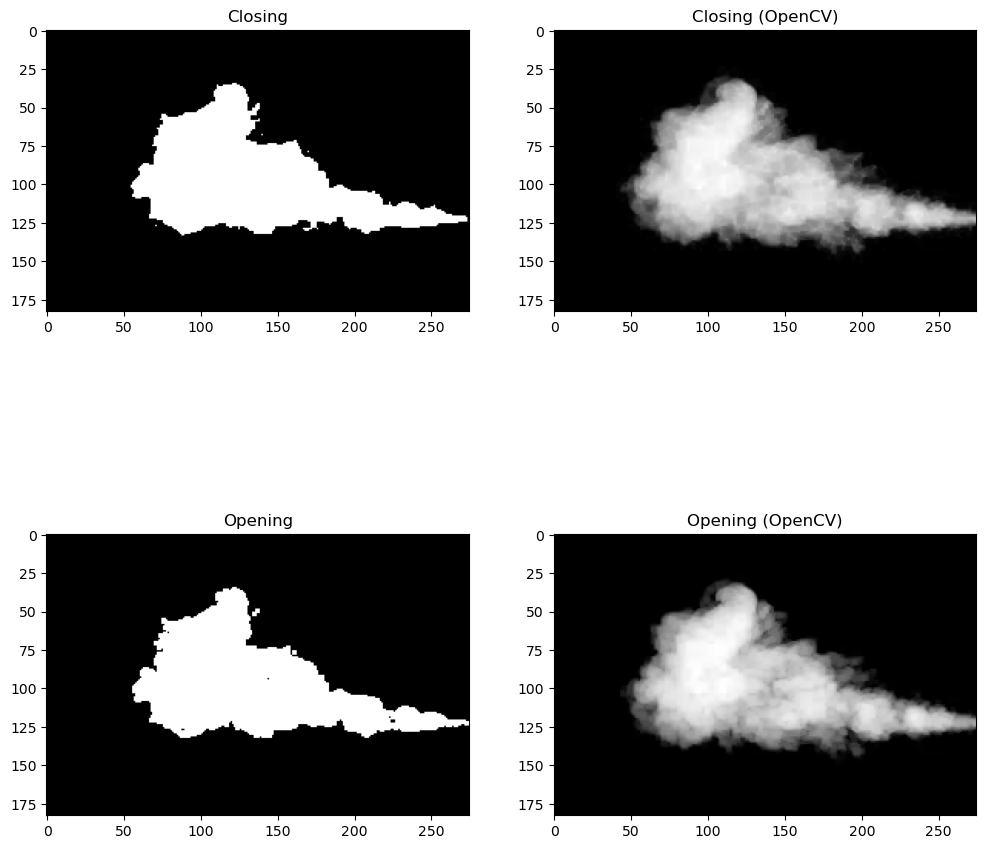

In [17]:
# Sample grayscale image
image_path = 'images.jpg'
image = Image.open(image_path)
structuring_element = np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]])

# Run the functions
closing_output = closing(image, structuring_element)
closingcv2_output = closingcv2(image, structuring_element)
opening_output = opening(image, structuring_element)
openingcv2_output = openingcv2(image, structuring_element)

# Display the results
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(closing_output, cmap='gray')
plt.title('Closing')

plt.subplot(2, 2, 2)
plt.imshow(closingcv2_output, cmap='gray')
plt.title('Closing (OpenCV)')

plt.subplot(2, 2, 3)
plt.imshow(opening_output, cmap='gray')
plt.title('Opening')

plt.subplot(2, 2, 4)
plt.imshow(openingcv2_output, cmap='gray')
plt.title('Opening (OpenCV)')

plt.show()


TASK 2

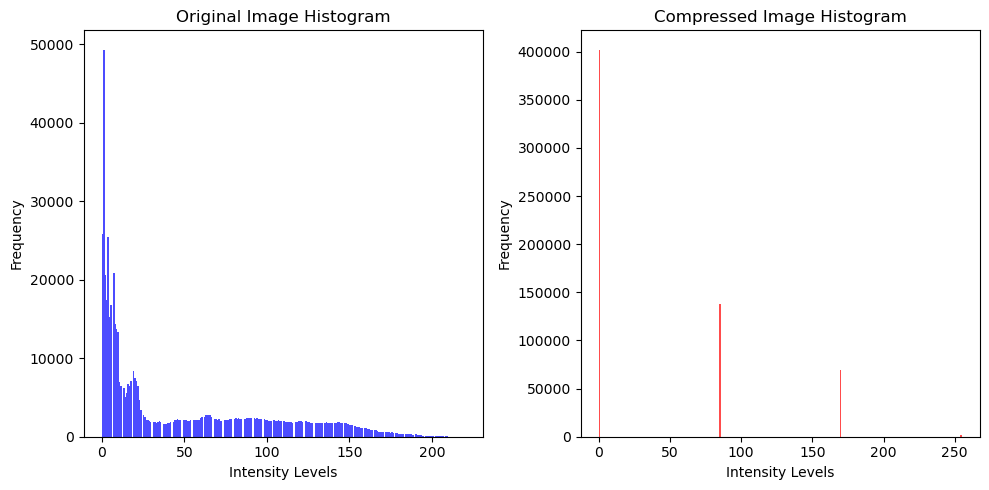

In [18]:
image_path = 'download (8).jpeg'
image = Image.open(image_path)
gray_image = image.convert('L')
gray_array = np.array(gray_image)
equalized_image = cv2.equalizeHist(gray_array)
normalized_image = gray_array / 255.0
num_levels = 4
quantized_image = np.floor(normalized_image * num_levels) / (num_levels - 1)
compressed_image = np.uint8(quantized_image * 255)
original_flat = gray_array.flatten()
compressed_flat = compressed_image.flatten()
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(original_flat, bins=256, color='blue', alpha=0.7)
plt.title('Original Image Histogram')
plt.xlabel('Intensity Levels')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(compressed_flat, bins=256, color='red', alpha=0.7)
plt.title('Compressed Image Histogram')
plt.xlabel('Intensity Levels')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
